### 1. درآمد خانوارهای شهری و روستایی استان چهارمحال و. بختیاری

In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_total_job_income(df, address):
    return df[df['Address'] == address]['netincome_w_y'].apply(to_int).sum()


def get_total_free_income(df, address):
    return df[df['Address'] == address]['income_s_y'].apply(to_int).sum()


def to_int(num):
    try:
        if type(num) == str:
            num = num.strip()
        return int(num)
    except Exception as e:
        return 0


def get_total_other_income(record):
    total_income = 0

    total_income += to_int(record['income_pension'])
    total_income += to_int(record['income_rent'])
    total_income += to_int(record['income_interest'])
    total_income += to_int(record['income_aid'])
    total_income += to_int(record['income_resale'])
    total_income += to_int(record['income_transfer'])

    return total_income


def get_total_subsidy_income(df, address):
    return df[df['Address'] == address]['subsidy'].apply(to_int).sum()


def get_total_income(df, address):
    return df[df['Address'] == address]['income'].apply(to_int).sum()


def calc_total_family_income(file_name):
    df_job_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S01')

    df_job_income['income'] = df_job_income.apply(lambda r: get_total_job_income(df_job_income, r['Address']), axis=1)
    df_job_income.drop_duplicates(subset=['Address'], inplace=True)
    df_job_income = df_job_income[['Address', 'income']]

    df_free_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S02')

    df_free_income['income'] = df_free_income.apply(lambda r: get_total_free_income(df_free_income, r['Address']), axis=1)
    df_free_income.drop_duplicates(subset=['Address'], inplace=True)
    df_free_income = df_free_income[['Address', 'income']]

    df_other_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S03')

    df_other_income.fillna(0, inplace=True)
    df_other_income['income'] = df_other_income.apply(lambda r: get_total_other_income(r), axis=1)
    df_other_income.drop_duplicates(subset=['Address'], inplace=True)
    df_other_income = df_other_income[['Address', 'income']]

    df_subsidy_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S04')

    df_subsidy_income['income'] = df_subsidy_income.apply(lambda r: get_total_subsidy_income(df_subsidy_income, r['Address']), axis=1)
    df_subsidy_income.drop_duplicates(subset=['Address'], inplace=True)
    df_subsidy_income = df_subsidy_income[['Address', 'income']]

    df_income = pd.concat([df_job_income, df_free_income, df_other_income, df_subsidy_income])
    df_income['income'] = df_income.apply(lambda r: get_total_income(df_income, r['Address']), axis=1)
    df_income.drop_duplicates(subset=['Address'], inplace=True)

    df_Data = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'Data')

    df_Data = df_Data[df_Data['province'] == 'CharmahalBakhtiari']
    df_Data = df_Data.merge(df_income, on='Address')

    return df_Data


In [3]:
R98_income = calc_total_family_income('R98.xlsx')
R98_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,21401545208,5,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,162420000
1,21401545211,5,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,306190000
2,21401545214,5,2,132.659492,1,2,NaN,1.0,NaN,1.0,NaN,NaN,NaN,211391.0,15.0,CharmahalBakhtiari,1,126920000
3,21401545217,5,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,28120000
4,21401545220,5,2,132.659492,1,2,NaN,1.0,NaN,1.0,NaN,NaN,NaN,211391.0,21.0,CharmahalBakhtiari,1,39000000


In [4]:
R99_income = calc_total_family_income('R99.xlsx')
R99_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,21401545215,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,125570000
1,21401545217,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,36110000
2,21401545221,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,56990000
3,21401545223,6,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,147290000
4,21401545226,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,218310000


In [5]:
R1400_income = calc_total_family_income('R1400.xlsx')
R1400_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,21401545221,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,118760000
1,21401545223,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,217920000
2,21401545225,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,CharmahalBakhtiari,1,624400000
3,21401545226,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,650805000
4,21401545232,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,402250000


In [6]:
R1401_income = calc_total_family_income('R1401.xlsx')
R1401_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,21402545926,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,667080000
1,21402545929,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,492080000
2,21402545932,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,981600000
3,21402545935,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,706400000
4,21402545938,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,423740000


In [7]:
U98_income = calc_total_family_income('U98.xlsx')
U98_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,11401171708,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,303760000
1,11401171711,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,594960018
2,11401171714,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,294995009
3,11401171717,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,185460000
4,11401171720,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,296380000


In [8]:
U99_income = calc_total_family_income('U99.xlsx')
U99_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,11401171714,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,421390000
1,11401171717,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,251130000
2,11401171720,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,CharmahalBakhtiari,1,388380000
3,11401171726,11,4,328.919621,1,2,NaN,2.0,NaN,1.0,NaN,NaN,NaN,55.0,27.0,1.0,2.0,CharmahalBakhtiari,1,58380000
4,11401171729,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,722730000


In [9]:
U1400_income = calc_total_family_income('U1400.xlsx')
U1400_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,11401171720,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,CharmahalBakhtiari,1,1023180000
1,11401171723,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,CharmahalBakhtiari,1,683740000
2,11401171727,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,CharmahalBakhtiari,1,64360000
3,11401171729,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,CharmahalBakhtiari,1,922640000
4,11401171732,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,CharmahalBakhtiari,1,217860000


In [10]:
U1401_income = calc_total_family_income('U1401.xlsx')
U1401_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,11401171826,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,1799010000
1,11401171829,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,455780000
2,11401171832,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,105080000
3,11401171838,1,348.310329,1,2,,,3,1,,,15.0,39.0,CharmahalBakhtiari,1,402680000
4,11401171841,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,545445000


### مقایسه درآمد خانوارهای روستایی و شهری در سال 1398


In [40]:
R98_income['income'].mean(), U98_income['income'].mean()

(257892684.6371308, 356801201.8595679)

In [41]:
R98_income['income'].std(), U98_income['income'].std()

(187244744.10251424, 273958709.03271013)

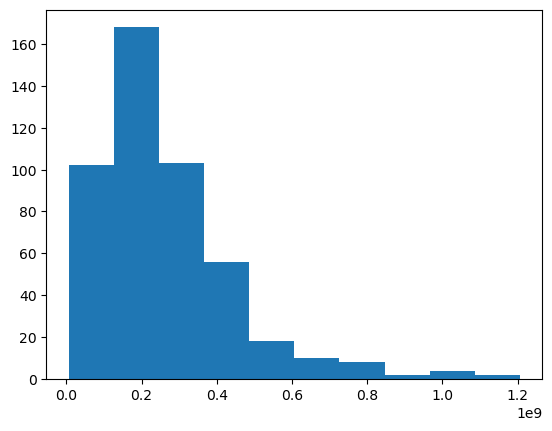

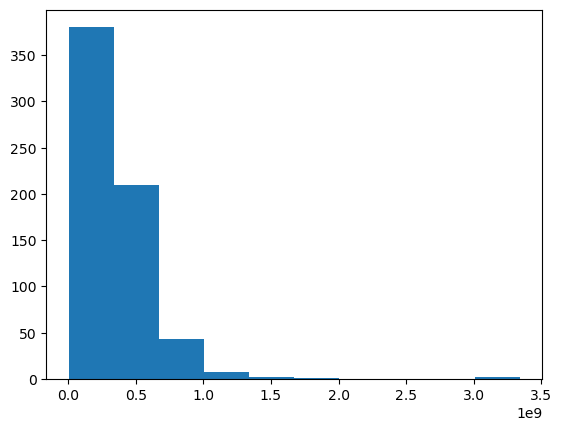

In [57]:
import matplotlib.pyplot as plt

plt.hist(R98_income['income'])
plt.show()
plt.hist(U98_income['income'])
plt.show()

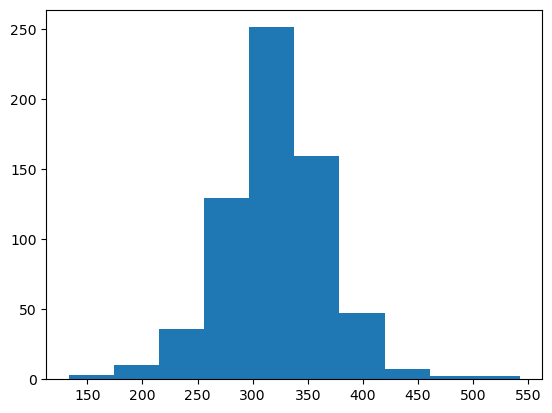

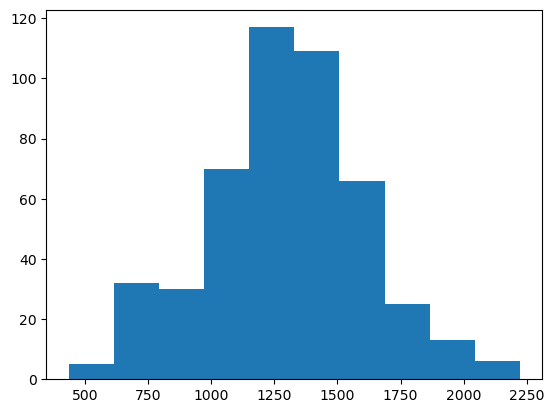

In [58]:
from scipy import stats

R98_income = R98_income[R98_income['income'] >= 0]
R98_income_normal, _ = stats.yeojohnson(R98_income['income'])

U98_income = U98_income[U98_income['income'] >= 0]
U98_income_normal, _ = stats.yeojohnson(U98_income['income'])

plt.hist(U98_income_normal, bins=10)
plt.show()
plt.hist(R98_income_normal, bins=10)
plt.show()

In [59]:
from scipy.stats import shapiro

shapiro(U98_income_normal), shapiro(R98_income_normal)

(ShapiroResult(statistic=0.9810089197800121, pvalue=1.9737189608277155e-07),
 ShapiroResult(statistic=0.9900141657976167, pvalue=0.0026715987513643686))

چون مقدار متغیر پی از 0.05 کمتر شده است در نتیجه فرض ما مبنی بر نرمال بودن داده ها رد می شود
در نتیجه داده ها همچنان غیر نرمال هستند و از تست دیگری استفاده می کنیم.

In [60]:
#n1 = len(U98_income['income'])
#n2 = len(R98_income['income'])
#x1 = U98_income['income'].mean()
#x2 = R98_income['income'].mean()
#s1 = U98_income['income'].std(ddof=1)
#s2 = R98_income['income'].std(ddof=1)

#degree_of_freedom = n1 + n2 - 2
#t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
#p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

#t_value, p_value

In [61]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(U98_income['income'], R98_income['income'])
u_stat, p_value

(197056.5, 1.1218963453189605e-16)

نتیجه می شود میانگین درآمدهای خانوارهای شهری و روستایی در سال 1398 با یکدیگر برابر نیست زیرا مقدار متغیر پی از 0.05 کمتر است
بنابراین فرض اولیه باطل شده و نتیجه می شود میانگین ها یکی نیستند

### مقایسه درآمد خانوارهای شهری و روستایی سال 1399

In [64]:
R99_income['income'].mean(), U99_income['income'].mean()

(385434775.8343685, 491890978.33228344)

In [65]:
R99_income['income'].std(), U99_income['income'].std()

(274244684.6791777, 323346342.1234748)

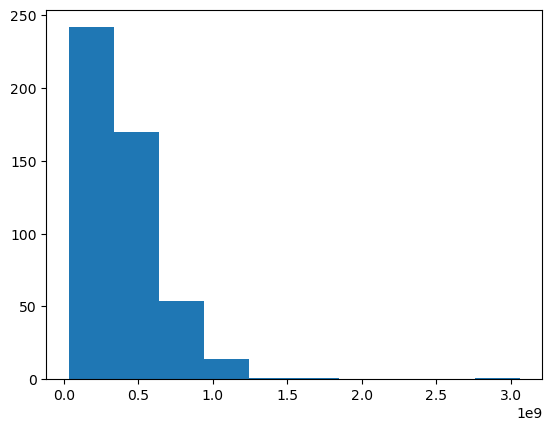

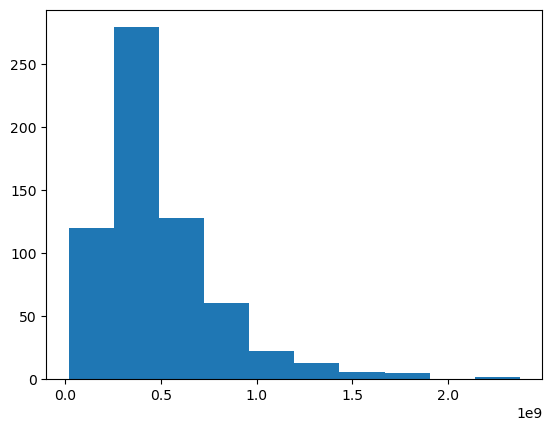

In [66]:
plt.hist(R99_income['income'])
plt.show()
plt.hist(U99_income['income'])
plt.show()

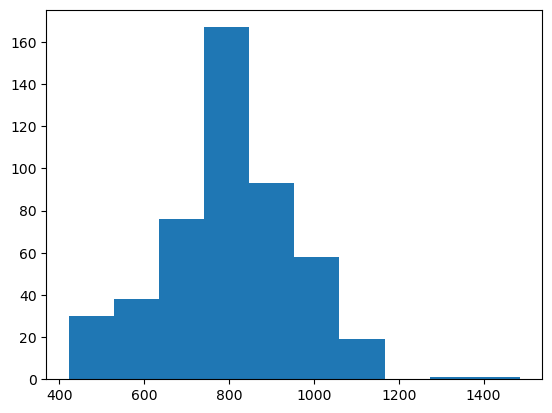

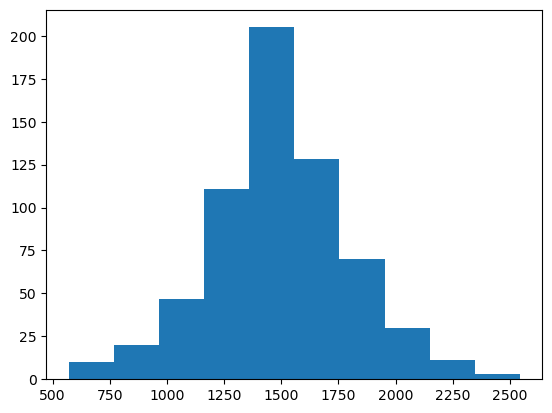

In [67]:
R99_income = R99_income[R99_income['income'] >= 0]
R99_income_normal, _ = stats.yeojohnson(R99_income['income'])

U99_income = U99_income[U99_income['income'] >= 0]
U99_income_normal, _ = stats.yeojohnson(U99_income['income'])

plt.hist(R99_income_normal, bins=10)
plt.show()
plt.hist(U99_income_normal, bins=10)
plt.show()

In [70]:
shapiro(U99_income_normal), shapiro(R99_income_normal)

(ShapiroResult(statistic=0.9876325773999854, pvalue=3.332934946895108e-05),
 ShapiroResult(statistic=0.9870688231383097, pvalue=0.00027640764662027154))

چون مقدار متغیر پی بسیار کمتر از 0.05 است پس میتوان فرض نرمال شدن داده ها را رد کرده و نتیجه گرفت که داده ها نرمال نیستند یا به عبارتی هنوز نرمال نشده اند
بنابراین از تست آماری دیگری استفاده می کنیم.

In [71]:
#n1 = len(U99_income['income'])
#n2 = len(R99_income['income'])
#x1 = U99_income['income'].mean()
#x2 = R99_income['income'].mean()
#s1 = U99_income['income'].std(ddof=1)
#s2 = R99_income['income'].std(ddof=1)

#degree_of_freedom = n1 + n2 - 2
#t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
#p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

#t_value, p_value

In [73]:
u_stat, p_value = mannwhitneyu(U99_income['income'], R99_income['income'])
u_stat, p_value

(188167.0, 7.524012910967868e-11)

اینجا نیز با کوچکتر بودن مقدار متغیر پی نسبت به 0.05 فرض برابری درآمدها نقض شده و نتیجه میگیریم که در سال 1399 نیز درآمد شهری ها و روستایی ها برابر نمی باشد

### مقایسه درآمد خانوارهای روستایی و شهری سال 1400

In [74]:
R1400_income['income'].mean(), U1400_income['income'].mean()

(569582833.5050917, 746060831.7096775)

In [75]:
R1400_income['income'].std(), U1400_income['income'].std()

(402311781.486489, 530935148.2879168)

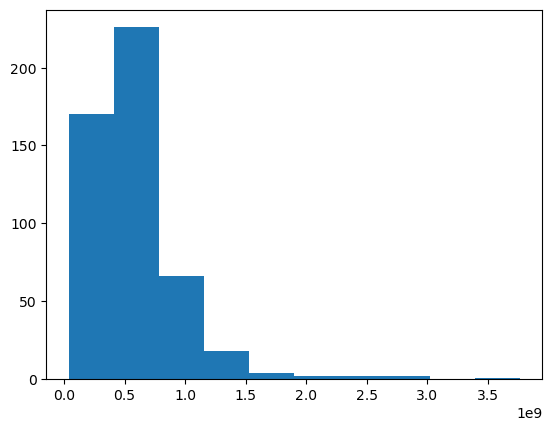

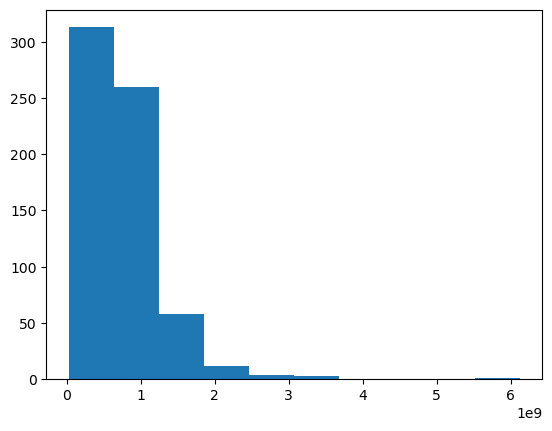

In [76]:
plt.hist(R1400_income['income'])
plt.show()
plt.hist(U1400_income['income'])
plt.show()

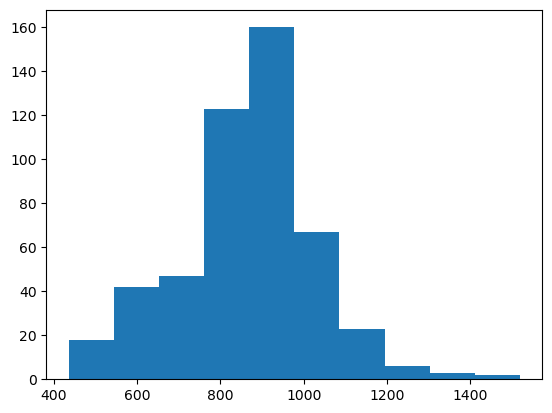

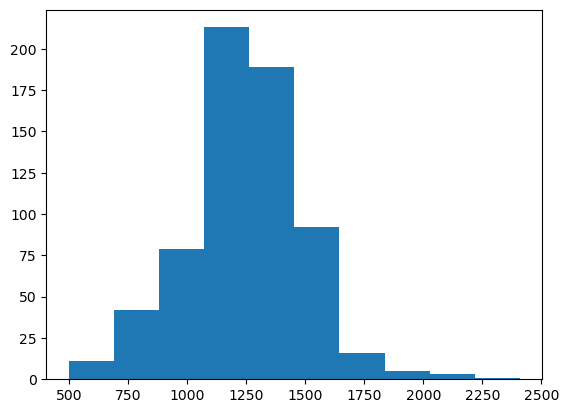

In [77]:
R1400_income = R1400_income[R1400_income['income'] >= 0]
R1400_income_normal, _ = stats.yeojohnson(R1400_income['income'])

U1400_income = U1400_income[U1400_income['income'] >= 0]
U1400_income_normal, _ = stats.yeojohnson(U1400_income['income'])

plt.hist(R1400_income_normal, bins=10)
plt.show()
plt.hist(U1400_income_normal, bins=10)
plt.show()

In [78]:
shapiro(U1400_income_normal), shapiro(R1400_income_normal)

(ShapiroResult(statistic=0.9830343972201561, pvalue=7.327970703303551e-07),
 ShapiroResult(statistic=0.9818424180889902, pvalue=8.268094606754816e-06))

چون مقدار متغیر پی بسیار کمتر از 0.05 است پس میتوان فرض نرمال شدن داده ها را رد کرده و نتیجه گرفت که داده ها نرمال نیستند یا به عبارتی هنوز نرمال نشده اند
بنابراین از تست آماری دیگری استفاده می کنیم.

In [79]:
#n1 = len(U99_income['income'])
#n2 = len(R99_income['income'])
#x1 = U99_income['income'].mean()
#x2 = R99_income['income'].mean()
#s1 = U99_income['income'].std(ddof=1)
#s2 = R99_income['income'].std(ddof=1)

#degree_of_freedom = n1 + n2 - 2
#t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
#p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

#t_value, p_value

In [80]:
u_stat, p_value = mannwhitneyu(U1400_income['income'], R1400_income['income'])
u_stat, p_value

(198409.5, 2.681240350131669e-12)

اینجا نیز با کوچکتر بودن مقدار متغیر پی نسبت به 0.05 فرض برابری درآمدها نقض شده و نتیجه میگیریم که در سال 1400 نیز درآمد شهری ها و روستایی ها برابر نمی باشد

### مقایسه درآمد خانوارهای شهری و روستایی سال 1401

In [85]:
R1401_income['income'].mean(), U1401_income['income'].mean()

(976059270.258727, 1217953281.0700152)

In [86]:
R1401_income['income'].std(), U1401_income['income'].std()

(649968260.2637795, 735230009.5400902)

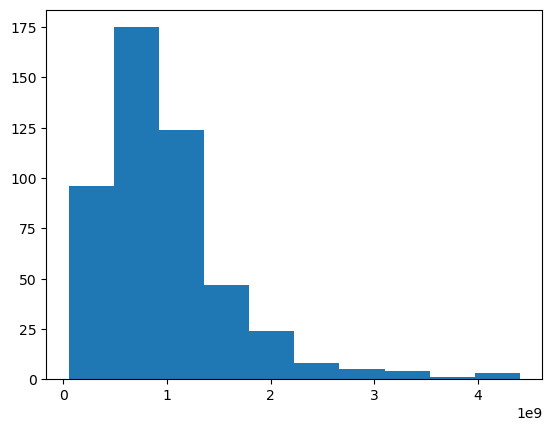

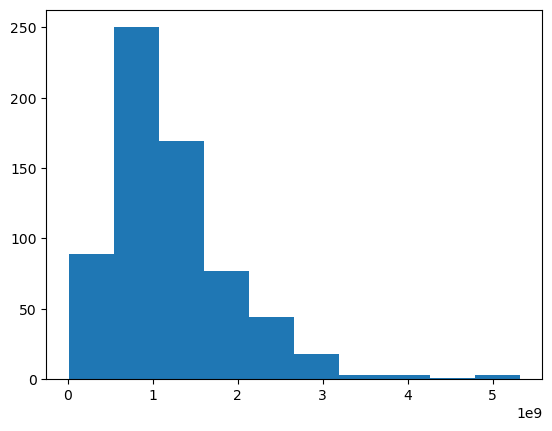

In [87]:
plt.hist(R1401_income['income'])
plt.show()
plt.hist(U1401_income['income'])
plt.show()

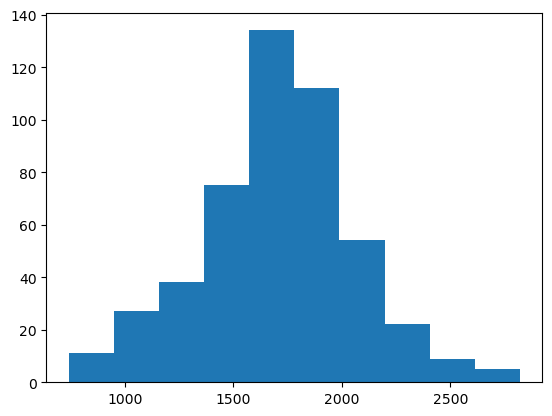

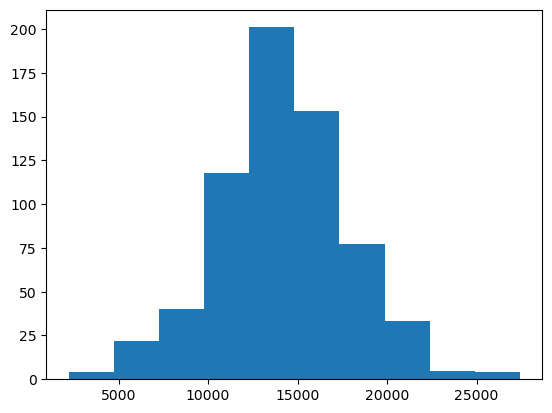

In [88]:
R1401_income = R1401_income[R1401_income['income'] >= 0]
R1401_income_normal, _ = stats.yeojohnson(R1401_income['income'])

U1401_income = U1401_income[U1401_income['income'] >= 0]
U1401_income_normal, _ = stats.yeojohnson(U1401_income['income'])

plt.hist(R1401_income_normal, bins=10)
plt.show()
plt.hist(U1401_income_normal, bins=10)
plt.show()

In [89]:
shapiro(U1401_income_normal), shapiro(R1401_income_normal)

(ShapiroResult(statistic=0.9912508353046431, pvalue=0.0006259307752805592),
 ShapiroResult(statistic=0.9910081670633774, pvalue=0.0046538271252705))

چون مقدار متغیر پی بسیار کمتر از 0.05 است پس میتوان فرض نرمال شدن داده ها را رد کرده و نتیجه گرفت که داده ها نرمال نیستند یا به عبارتی هنوز نرمال نشده اند
بنابراین از تست آماری دیگری استفاده می کنیم.

In [90]:
#n1 = len(U99_income['income'])
#n2 = len(R99_income['income'])
#x1 = U99_income['income'].mean()
#x2 = R99_income['income'].mean()
#s1 = U99_income['income'].std(ddof=1)
#s2 = R99_income['income'].std(ddof=1)

#degree_of_freedom = n1 + n2 - 2
#t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
#p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

#t_value, p_value

In [91]:
u_stat, p_value = mannwhitneyu(U1401_income['income'], R1401_income['income'])
u_stat, p_value

(195839.0, 8.588582499822181e-11)

اینجا نیز با کوچکتر بودن مقدار متغیر پی نسبت به 0.05 فرض برابری درآمدها نقض شده و نتیجه میگیریم که در سال 1401 نیز درآمد شهری ها و روستایی ها برابر نمی باشد